<a href="https://colab.research.google.com/github/harshalDharpure/Neural_Network_Architecture/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

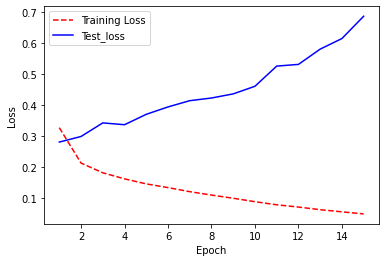

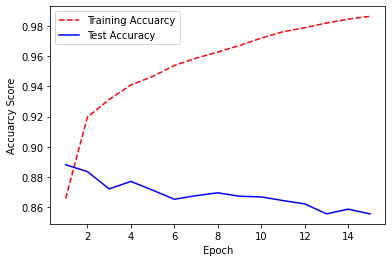

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")




#set random seed
np.random.seed(0)

#set the number of features you want

number_of_features=10000

#load data and review data
(data_train,target_train),(data_test,target_test)=imdb.load_data(num_words=number_of_features)

#one-hot encoding 
tokenizer=Tokenizer(num_words=number_of_features)
features_train=tokenizer.sequences_to_matrix(data_train,mode="binary")
features_test=tokenizer.sequences_to_matrix(data_test,mode="binary")

#start neural Model
network=models.Sequential()
network.add(layers.Dense(units=16,activation="relu",input_shape=(number_of_features,)))
network.add(layers.Dense(units=16,activation="relu"))
network.add(layers.Dense(units=1,activation="sigmoid"))

#compile a neural network
network.compile(loss="binary_crossentropy",
               optimizer="RMSprop",
               metrics=["accuracy"])
#train model
history=network.fit(features_train,
                   target_train,
                   epochs=15,
                   verbose=0,
                   validation_data=(features_test,target_test))
#get training and test loss history
training_loss=history.history["loss"]
test_loss=history.history["val_loss"]

#create count number of epochs
epoch_count=range(1,len(training_loss)+1)

#visualize loss history

plt.plot(epoch_count,training_loss,"r--")
plt.plot(epoch_count,test_loss,"b-")
plt.legend(["Training Loss","Test_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

#Get training test accuracy histories

training_accuracy=history.history["accuracy"]
test_accuracy=history.history["val_accuracy"]
plt.plot(epoch_count,training_accuracy,"r--")
plt.plot(epoch_count,test_accuracy,"b-")

#visualize accuracy history

plt.legend(["Training Accuarcy","Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuarcy Score")
plt.show()

In [ ]:
# Reducing Overfitting with weight Regularization

import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers

#set random seed
np.random.seed(0)

#set the number of features
number_of_features=1000

#load data and target vector from movie dataset

(data_train,target_train),(data_test,target_test)=imdb.load_data(num_words=number_of_features)

#one hot encoding

tokenizer=Tokenizer(num_words=number_of_features)
features_train=tokenizer.sequences_to_matrix(data_train,mode="binary")
features_test=tokenizer.sequences_to_matrix(data_test,mode="binary")

#start a neural network model
network=models.Sequential()
network.add(layers.Dense(units=16,activation="relu",kernel_regularizer=regularizers.l2(0.01),input_shape=(number_of_features,)))
network.add(layers.Dense(units=16,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
network.add(layers.Dense(units=1,activation="sigmoid"))

#compile a neural network

network.compile(loss="binary_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

#Train neural network model

history=network.fit(features_train,
                    target_train,
                    epochs=3,
                    verbose=1,
                    batch_size=100,
                    validation_data=(features_test,target_test))




Epoch 1/3
250/250 [==============================] - 3s 7ms/step - loss: 0.8008 - accuracy: 0.7349 - val_loss: 0.4912 - val_accuracy: 0.8522
Epoch 2/3
250/250 [==============================] - 1s 6ms/step - loss: 0.4691 - accuracy: 0.8543 - val_loss: 0.4476 - val_accuracy: 0.8551
Epoch 3/3
250/250 [==============================] - 1s 5ms/step - loss: 0.4365 - accuracy: 0.8587 - val_loss: 0.4284 - val_accuracy: 0.8565


**Reducing OverFitting with early stopping.**

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models 
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

#set random seed
np.random.seed(0)

# add number of features
number_of_features=1000

#add data to vectors
(data_train,target_train),(data_test,target_test)=imdb.load_data(num_words=number_of_features)

#one hot encoding
tokenizer=Tokenizer(num_words=number_of_features)
features_train=tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test=tokenizer.sequences_to_matrix(data_test, mode="binary")

#start neural network model
network=models.Sequential()
network.add(layers.Dense(units=16,activation="relu",input_shape=(number_of_features,)))
network.add(layers.Dense(units=16,activation="relu"))
network.add(layers.Dense(units=1,activation="sigmoid"))

#compile a network
network.compile(loss="binary_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])
#set callbacks function

callbacks=[EarlyStopping(monitor="val_loss",
                         patience=2),ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",save_best_only=True)]


#train neural network

history=network.fit(features_train,
                    target_train,
                    epochs=20,
                    verbose=1,
                    batch_size=100,
                    validation_data=(features_test,target_test))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

Epoch 1/20
250/250 [==============================] - 16s 5ms/step - loss: 0.5149 - accuracy: 0.7476 - val_loss: 0.3438 - val_accuracy: 0.8544
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3196 - accuracy: 0.8704 - val_loss: 0.3263 - val_accuracy: 0.8601
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3105 - accuracy: 0.8670 - val_loss: 0.3293 - val_accuracy: 0.8592
Epoch 4/20
250/250 [==============================] - 1s 5ms/step - loss: 0.2912 - accuracy: 0.8763 - val_loss: 0.3239 - val_accuracy: 0.8595
Epoch 5/20
250/250 [==============================] - 1s 4ms/step - loss: 0.2864 - accuracy: 0.8816 - val_loss: 0.3255 - val_accuracy: 0.8588
Epoch 6/20
250/250 [==============================] - 1s 4ms/step - loss: 0.2755 - accuracy: 0.8803 - val_loss: 0.3339 - val_accuracy: 0.8576
Epoch 7/20
250/250 [==============================] - 1s 4ms/step - loss: 0.2615 - accuracy: 0.8910 - val_loss: 0.3315 - val_accuracy: 0.8583
Epoch

**Reducing OverFitting With Dropout Layer**

In [ ]:
#add noise
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

#set random seed
np.random.seed(0)

#add features
number_of_features=1000

#data review

(data_train,target_train),(data_test,target_test)=imdb.load_data(num_words=number_of_features)

#one hot-encoding

tokenizer=Tokenizer(num_words=number_of_features)
features_train=tokenizer.sequences_to_matrix(data_train,mode="binary")
features_test=tokenizer.sequences_to_matrix(data_test,mode="binary")

#start a neural network model

network=models.Sequential()
network.add(layers.Dropout(0.2,input_shape=(number_of_features,)))
network.add(layers.Dense(units=16,activation="relu"))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=16,activation="relu"))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=1,activation="sigmoid"))

network.compile(loss="binary_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])
history=network.fit(features_train,
                    target_train,
                    epochs=3,
                    verbose=1,
                    batch_size=100,
                    validation_data=(features_test,target_test))




<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

Epoch 1/3
250/250 [==============================] - 17s 7ms/step - loss: 0.6669 - accuracy: 0.5805 - val_loss: 0.4861 - val_accuracy: 0.8259
Epoch 2/3
250/250 [==============================] - 1s 5ms/step - loss: 0.5319 - accuracy: 0.7536 - val_loss: 0.4021 - val_accuracy: 0.8406
Epoch 3/3
250/250 [==============================] - 1s 5ms/step - loss: 0.4705 - accuracy: 0.7989 - val_loss: 0.3616 - val_accuracy: 0.8554
